In [1]:
import adddeps
from pltconf import *
from utils.utils import standartize
import numpy as np
from scipy.stats import norm,normaltest, probplot

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pandas as pd
import sys, os
import pickle

In [2]:
with open("snap.pkl", "rb") as f:
    rs = pickle.load(f)

In [3]:
rs.shape

(20000, 2, 523)

In [4]:
import matplotlib as mpl

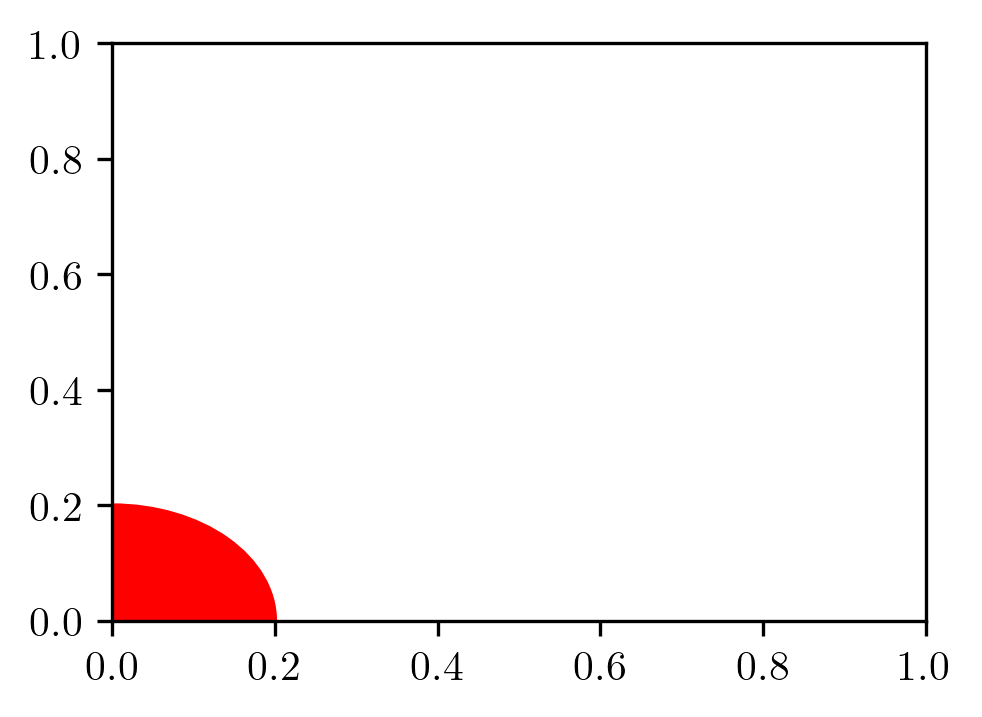

In [6]:
circle1 = plt.Circle((0, 0), 0.025, color='r')
plt.gca().add_patch(circle1)

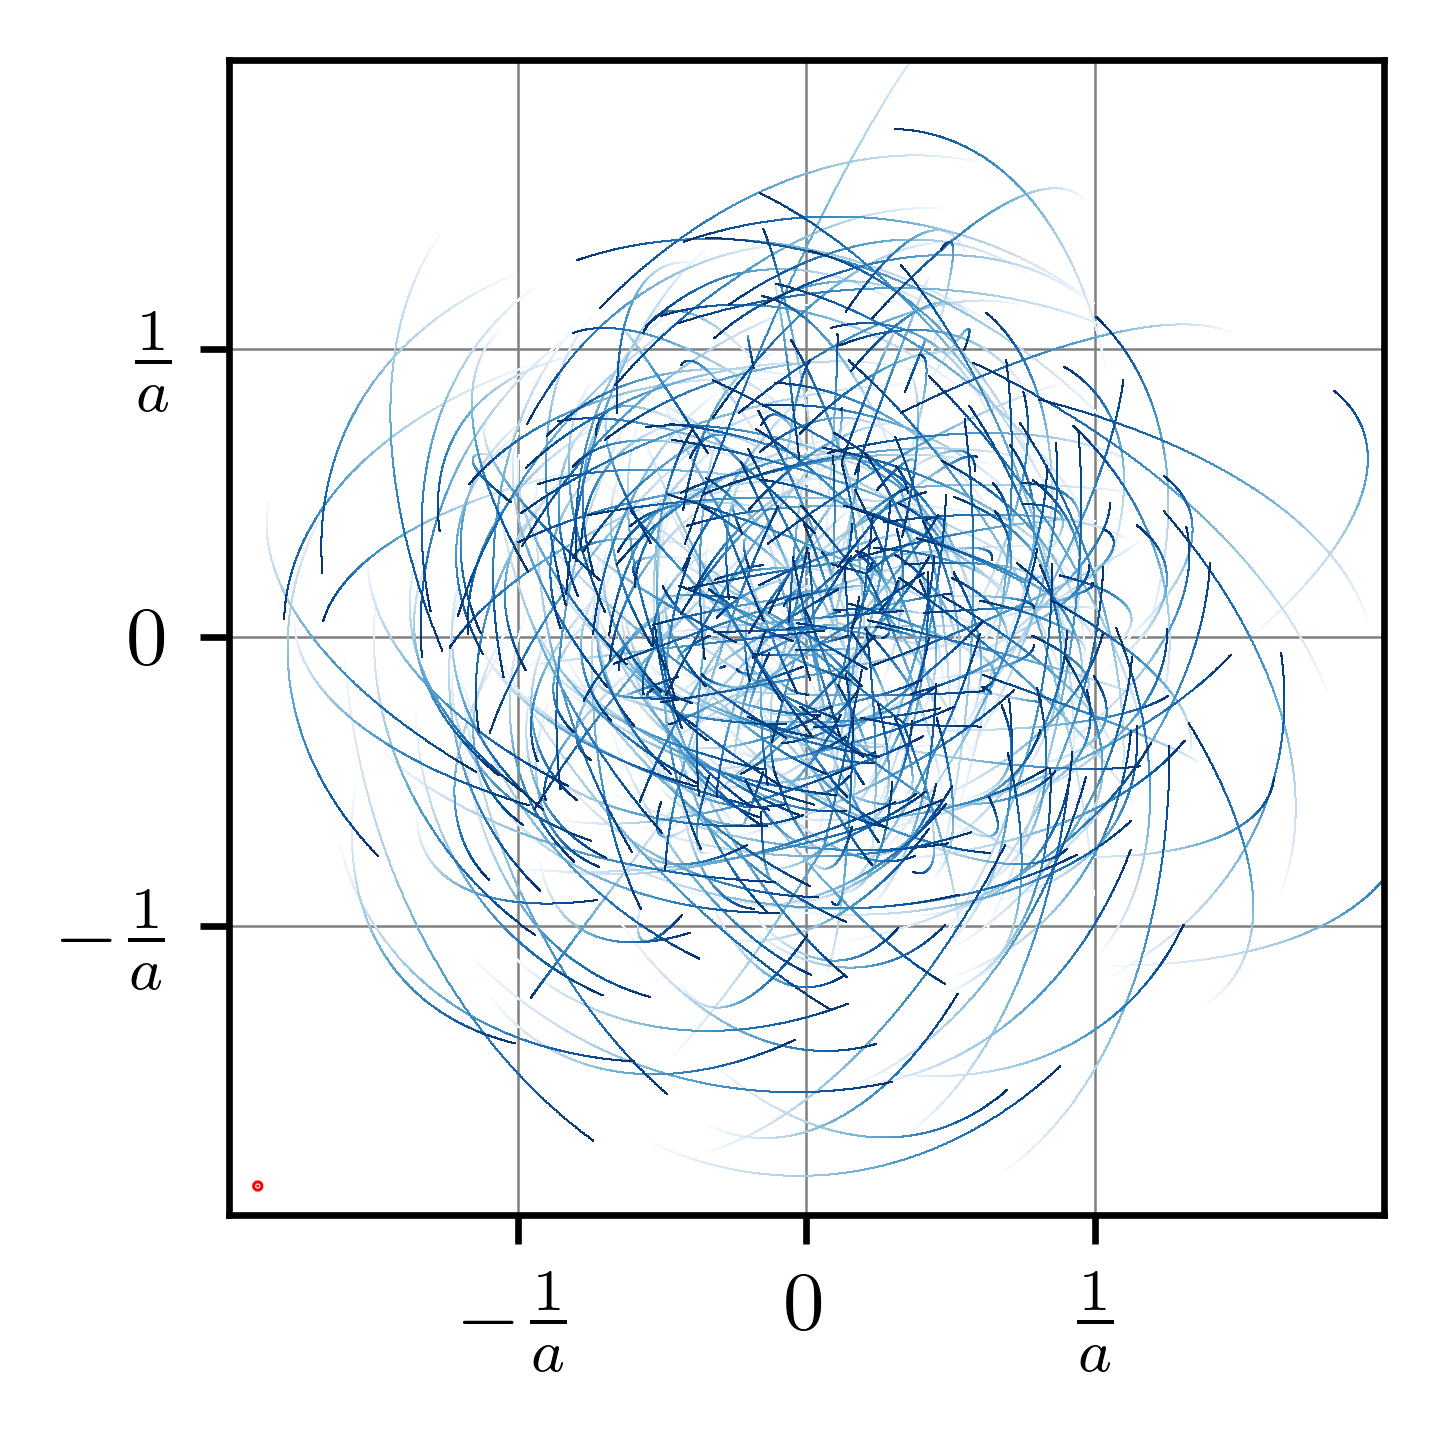

In [10]:
plt.figure(dpi=600, figsize=(3.5,2.5))
ti = 0
n = 500
sp = 1
n = n // sp

a = 5 # =item.a

ax = plt.gca()
ax.set_aspect("equal")

# ax.set_xticks([-a,0, a], ["$-a^{-1}$",0,"$a^{-1}$"])
ax.set_xticks([-a,0, a], [r"$-\frac{1}{a}$",0,r"$\frac{1}{a}$"])
ax.set_yticks([-a,0, a], [r"$-\frac{1}{a}$",0,r"$\frac{1}{a}$"])
ka = 2*a
plt.xlim(-ka, ka)
plt.ylim(-ka, ka)

ax.set_axisbelow(True)
plt.grid()
plt.grid(which='major', linestyle='-', linewidth='0.3', color='gray')

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
for i in (range(n)):
#     plt.plot(rs[ti+sp*i,0, filt], rs[ti+sp*i,1, filt], lw=0, marker=".", ms=0.1, color= cmap.to_rgba(i/n))
    
    plt.scatter(rs[ti+sp*i,0], rs[ti+sp*i,1], s=0.08,alpha=1 ,marker=",",linewidths=0,
                color=cmap.to_rgba(i/n),rasterized=True)

circle1 = plt.Circle((-0.95*ka, -0.95*ka), 0.025, color='r')
plt.gca().add_patch(circle1)

plt.savefig("snap.pdf", bbox_inches="tight")
# plt.savefig("snap.pdf")

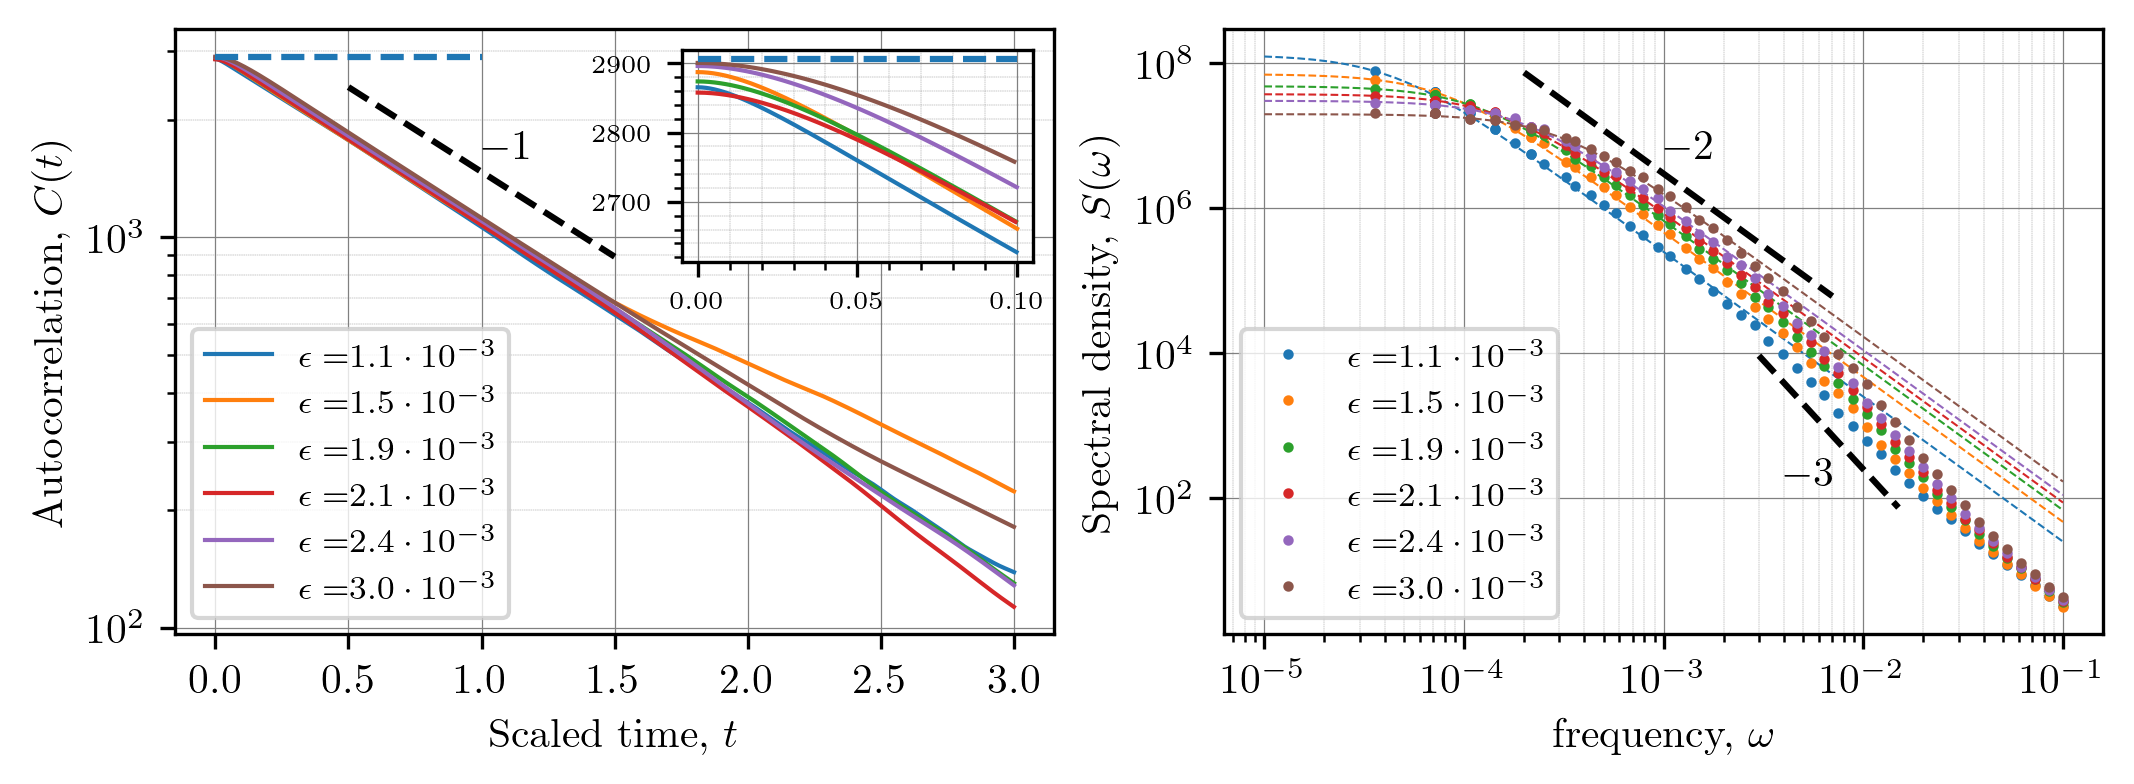

In [16]:
fig = plt.figure(constrained_layout=True, figsize=(7,2.5),
                #  linewidth=10, edgecolor="#04253a"
                 )
spec5 = fig.add_gridspec(ncols=2, nrows=1, hspace=0.005)
#################################################

ax = fig.add_subplot(spec5[0, 0])


for proc in procs:
    eps = proc["eps"]
    label = r"$\epsilon=$"+ f"${eps*1e3:0.1f}"+r"\cdot 10^{-3}$"
    df = proc["C"]
    df = df[df["t1"]<3]
    ax.plot(df["t1"], df["C"], lw=1, label=label)


ax.legend(fontsize=8,loc='lower left')

ax.set_yscale("log")

ts = np.array([0.5,1.5])
ax.plot(ts, 4e3*np.exp(-ts), "--", color="black")
ax.text(1,1.6e3, '$-1$')

ax.hlines(y=2905.552, xmin=0, xmax=1, ls="--")

ax.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

ax.set_xlabel("Scaled time, $t$")
ax.set_ylabel("Autocorrelation, $C(t)$")

### inset
inset_ax = inset_axes(ax, width="40%", height="35%", loc="upper right")
for proc in procs:
    df = proc["C"]
    df = df[df["t1"]<0.1]
    inset_ax.plot(df["t1"], df["C"], lw=1)
inset_ax.tick_params(axis='both', which='major', labelsize=6)
inset_ax.minorticks_on()
inset_ax.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
inset_ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
inset_ax.hlines(y=2905.552, xmin=0, xmax=0.1, ls="--")

# inset_ax.set_yscale("log")
#######

#################################################
ax = fig.add_subplot(spec5[0, 1])

i=0
for proc, c in zip(procs, colors):
    alpha = proc["alpha"]
    df =  proc["spectr"].loc[:0.1].iloc[1:]
    eps = proc["eps"]
    label = r"$\epsilon=$"+f"${eps*1e3:0.1f}"+r"\cdot 10^{-3}$"

    
    omegas = np.logspace(np.log10(1e-5), np.log10(df.index[-1]))
    
    ax.plot(omegas, proc["C"].iloc[0]["C"] * 2* alpha / (alpha**2 + omegas**2),
             color=c, lw=0.5, ls="--")
    
    omega_target = np.logspace(np.log10(df.index[0]), np.log10(df.index[-1]), 50+i)
    ids = np.searchsorted(df.index+1e-7, omega_target)
    df = df.iloc[ids]
    
    plt.plot(df.index, df["S"], lw=0, marker=".",ms=3,color=c,  label=label)
    
omegas = np.array([2e-4,7e-3])
plt.plot(omegas, 3e-0 * omegas ** (-2), "--", color="black")
ax.text(1e-3,0.5e7, '$-2$')


omegas = np.array([3e-3,15e-3])
plt.plot(omegas, 2.5e-4 * omegas ** (-3), "--", color="black",)
ax.text(4e-3,1.5e2, '$-3$')

ax.minorticks_on()

ax.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("frequency, $\omega$")
ax.set_ylabel("Spectral density, $S(\omega)$")
ax.legend(fontsize=8,loc='lower left')

plt.savefig("CS.pdf", bbox_inches="tight")